In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import torch
import torchvision
import torchvision.transforms as tr
import torch.nn as nn
from torch.utils.data import random_split
import torch.optim as optim
from torchvision import models
import copy


In [2]:
device = "cpu"
print(device)

cpu


In [3]:
trainset = torchvision.datasets.MNIST(root="./data",
                                      train=True,
                                      download=True)

testset = torchvision.datasets.MNIST(root="./data",
                                     train=False,
                                     download=True)

print('Len of train dataset ',len(trainset))
print('Len of test dataset ',len(testset))
print('-'*30)
print(trainset)
print(testset)
print('-'*30)
print(trainset[0])
print(testset[0])
print('-'*30)
trainset[0][0]

Len of train dataset  60000
Len of test dataset  10000
------------------------------
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
------------------------------
(<PIL.Image.Image image mode=L size=28x28 at 0x7F8C38FDB9A0>, 5)
(<PIL.Image.Image image mode=L size=28x28 at 0x7F8C4A8B4A00>, 7)
------------------------------


Label : 9


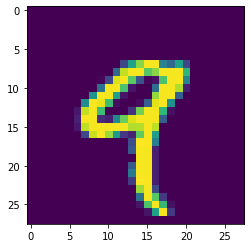

In [4]:
image, label = trainset[4]
plt.imshow(image)
print("Label :", label)

In [5]:
trainset = torchvision.datasets.MNIST(root="./data",
                                      train=True,
                                      download=True,
                                      transform=tr.ToTensor())

testset = torchvision.datasets.MNIST(root="./data",
                                     train=False,
                                     download=True,
                                     transform=tr.ToTensor())



In [6]:
trainset,valset = random_split(trainset,[50000,10000])
len(trainset),len(valset)

(50000, 10000)

In [7]:
batch_size = 128

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True)

valloader = torch.utils.data.DataLoader(valset,
                                        batch_size=batch_size,
                                        shuffle=False)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         shuffle=False)

classes = ('0','1','2','3','4','5','6','7','8','9')

In [8]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1,6,5),
            nn.Tanh(),
            nn.AvgPool2d(2,stride=2),
            nn.Conv2d(6,16,5),
            nn.Tanh(),
            nn.AvgPool2d(2,stride=2)
        )
        
        self.fc_model = nn.Sequential(
            nn.Linear(256,120),
            nn.Tanh(),
            nn.Linear(120,84),
            nn.Tanh(),
            nn.Linear(84,10)
        )
        
    def forward(self,x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x


net = LeNet()
net

LeNet(
  (cnn_model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [9]:
def evaluation(dataloader):
    total, correct= 0,0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        output = net(inputs)
        max_pred,pred = torch.max(output.data,dim=1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct/total


In [10]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Val accuracy: 93.78 , Train accuracy : 94.05
Val accuracy: 96.44 , Train accuracy : 96.75
Val accuracy: 97.11 , Train accuracy : 97.80
Val accuracy: 97.67 , Train accuracy : 98.31
Val accuracy: 98.03 , Train accuracy : 98.66
Val accuracy: 98.02 , Train accuracy : 98.73
Val accuracy: 98.25 , Train accuracy : 99.05
Val accuracy: 98.18 , Train accuracy : 99.01
Val accuracy: 98.31 , Train accuracy : 99.21
Val accuracy: 98.00 , Train accuracy : 99.13
Val accuracy: 98.40 , Train accuracy : 99.39
Val accuracy: 98.43 , Train accuracy : 99.46
Val accuracy: 98.71 , Train accuracy : 99.65
Val accuracy: 98.44 , Train accuracy : 99.66
Val accuracy: 98.63 , Train accuracy : 99.68
Val accuracy: 98.45 , Train accuracy : 99.58


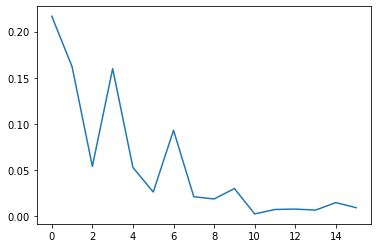

CPU times: user 25min 7s, sys: 14min 20s, total: 39min 27s
Wall time: 4min 56s


In [11]:
%%time
def fit(max_epochs=16):
    
    loss_arr = []
    loss_epoch_arr = []
    
    for epoch in range(max_epochs):
            for i,data in enumerate(trainloader,0):
                inputs,labels = data
                inputs,labels = inputs.to(device),labels.to(device)
                
                opt.zero_grad()
                
                outputs = net(inputs)
                loss = loss_fn(outputs,labels)
                loss.backward()
                opt.step()
                
                loss_arr.append(loss.item())
            loss_epoch_arr.append(loss.item())
            print('Val accuracy: %0.2f , Train accuracy : %0.2f'%(evaluation(valloader),evaluation(trainloader)))
    
    plt.plot(loss_epoch_arr)
    plt.show()
    
fit()

Note that the above training time is significantly shorter because of the full utilization of the hardware. 8 Cores were used during the training process.